<a href="https://colab.research.google.com/github/Bornitaadhikari/Machine-Learning/blob/main/Normalization%2CRemoving_Outliers%2CLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1jRRudXQV21R5A_-kmokghJHfbS7ovXfl'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Fish.csv')

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
Fish = pd.read_csv('Fish.csv') 
Fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
Fish.loc[:50,['Length1','Length2','Length3']]

,Length1,Length2,Length3
0,23.2,25.4,30.0
1,24.0,26.3,31.2
2,23.9,26.5,31.1
3,26.3,29.0,33.5
4,26.5,29.0,34.0
5,26.8,29.7,34.7
6,26.8,29.7,34.5
7,27.6,30.0,35.0
8,27.6,30.0,35.1
9,28.5,30.7,36.2


In [ ]:
data=Fish.loc[:,['Weight','Length1','Length2','Length3','Height','']]

In [ ]:
data=Fish.iloc[:,1:]

In [ ]:
data

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


**Normalizaton**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalize= MinMaxScaler(feature_range=(0,1))

In [ ]:
from re import X
x_normalize = normalize.fit_transform(data)

In [ ]:
 x_normalize

array([[1.46666667e-01, 3.04854369e-01, 3.09090909e-01, 3.58108108e-01,
        5.68334049e-01, 4.18978349e-01],
       [1.75757576e-01, 3.20388350e-01, 3.25454545e-01, 3.78378378e-01,
        6.24055350e-01, 4.59235453e-01],
       [2.06060606e-01, 3.18446602e-01, 3.29090909e-01, 3.76689189e-01,
        6.18123353e-01, 5.14278868e-01],
       [2.20000000e-01, 3.65048544e-01, 3.74545455e-01, 4.17229730e-01,
        6.38566105e-01, 4.80364795e-01],
       [2.60606061e-01, 3.68932039e-01, 3.74545455e-01, 4.25675676e-01,
        6.21965801e-01, 5.76003608e-01],
       [2.72727273e-01, 3.74757282e-01, 3.87272727e-01, 4.37500000e-01,
        6.89202837e-01, 5.46882048e-01],
       [3.03030303e-01, 3.74757282e-01, 3.87272727e-01, 4.34121622e-01,
        7.22699465e-01, 5.96371786e-01],
       [2.36363636e-01, 3.90291262e-01, 3.92727273e-01, 4.42567568e-01,
        6.35083524e-01, 5.13419035e-01],
       [2.72727273e-01, 3.90291262e-01, 3.92727273e-01, 4.44256757e-01,
        7.12565153e-01, 

Z-score help to remove outliers from **dataset**

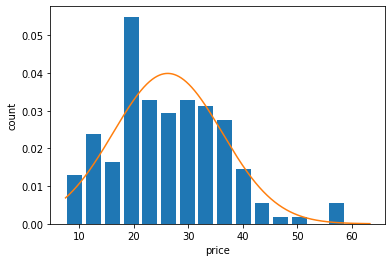

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
plt.hist(Fish.Length1,bins=15,rwidth=0.8,density=True)
plt.xlabel("price")
plt.ylabel("count")

rng=np.arange(Fish.Length1.min(),Fish.Length2.max(),0.05)
plt.plot(rng,norm.pdf(rng,Fish.Length1.mean(),Fish.Length1.std()))

In [ ]:
dataset = pd.read_csv("/content/Salary_Data.csv")

In [ ]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:

reg =LinearRegression

In [ ]:
x=dataset.iloc[:,0:1]
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [ ]:
y=dataset.iloc[:,1:2]

In [ ]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg =LinearRegression

In [ ]:
from sklearn import linear_model
reg = LinearRegression()

In [ ]:
reg =reg.fit(x_train,y_train)

In [ ]:
reg=reg.score(x_test,y_test)